# <center>  GEOS3009/3909 – COASTAL ENVIRONMENTS AND PROCESSES

## <center>   PRACTICAL – PROCESSING WAVE DATA
    
<br>
<br>
<br>


### Notebook 2: Wave Analysis
<br>

<font size="3">
Now that our data is ready to be analysed. we will use an open-source python library called OCEANLYZ. 
    
[Read more about OCEANLYZ here.](https://oceanlyz.readthedocs.io/en/latest/)

</font>

Import some libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import oceanlyz
from matplotlib.pyplot import cm
from scipy.ndimage.filters import gaussian_filter1d

ModuleNotFoundError: No module named 'oceanlyz'

In [2]:
#Import the csv's we created in the previous notebook:
maroubra = pd.read_csv('..\data\maroubra_data.csv')
malabar = pd.read_csv('..\data\mal_data.csv')

In [3]:
#Convert to datetime again
maroubra['dates'] = pd.to_datetime(maroubra['dates'])
malabar['dates'] = pd.to_datetime(malabar['dates'])


In [203]:
def get_bursts(data):
    Hz=8
    rl=15/8   
    bl=15*60 #burst length 5min x 60sec
    nbl = int(np.floor(len(ocn.data)/(bl*Hz)))
   
    print('Number of bursts is %s and burst duration is %s seconds' %(nbl, bl))
    if nbl>1000:
        print('WARNING:')
        print('Oceanlyz has a limit of 900 bursts. Try cut the data and analyse separately')
        print('Try cutting the data into %s'%(nbl/900))
    print('')    
    print('Sensor start:')
    print(np.min(data.dates))
    print('Sensor finish:')
    print(np.max(data.dates))
    print('Total duration: ')
    td=np.max(data.dates)-np.min(data.dates)
    mins = td.days*24*60 + td.seconds/60
    print('%s mins' %(mins))
    
    return bl, nbl
bl, nbl = get_bursts(maroubra)

Number of bursts is 4 and burst duration is 900 seconds

Sensor start:
2021-04-16 10:30:00
Sensor finish:
2021-04-16 11:30:00
Total duration: 
60.0 mins


In [204]:
#Here we set up the oceanlyz parameters. 
def run_oceanlyz(data):
    #start Oceanlyz 
    ocn = oceanlyz.oceanlyz()
    ocn.data = data['pressure'] * 10000 #Convert dbar to pa
    
    #set up oceanlyz parameters:
    ocn.InputType='pressure'
    ocn.OutputType='wave+waterlevel'
    ocn.AnalysisMethod='spectral'    #We can also select a 'zero-crossing' method of wave analysis
    ocn.n_burst=nbl
    ocn.burst_duration=bl
    ocn.fs=8                         #Samples are at 8 Hz
    ocn.SeparateSeaSwell='yes'
    ocn.seaswellCalc='on'
    ocn.fmin=0.05
    ocn.fmax=ocn.fs/2
    ocn.fmaxpcorrCalcMethod='auto'   #Only required if ocn.InputType='pressure'
    ocn.Kpafterfmaxpcorr='constant'  #Only required if ocn.InputType='pressure'
    ocn.fminpcorr=0.15            #Only required if ocn.InputType='pressure'
    ocn.fmaxpcorr=0.55               #Only required if ocn.InputType='pressure'
    ocn.heightfrombed=0.05           #Only required if ocn.InputType='pressure'
    ocn.dispout='no'
    ocn.Rho=1024                     #Seawater density (Varies)
    
    #Run onceanlyz:
    ocn.runoceanlyz()
    return ocn.wave

In [205]:
mar_waves = run_oceanlyz(maroubra)

--------------------------------------------------
OCEANLYZ Ver 2.0
www.ArashKarimpour.com
Copyright (C) 2012 - 2023  Arash Karimpour
--------------------------------------------------
Parameters (only required ones used)
--------------------------------------------------
InputType           :  pressure
OutputType          :  wave+waterlevel
-------------------------------
AnalysisMethod      :  spectral
-------------------------------
n_burst             :  4
burst_duration      :  900
fs                  :  8
-------------------------------
fmin                :  0.05
fmax                :  4.0
-------------------------------
fmaxpcorrCalcMethod :  auto
Kpafterfmaxpcorr    :  constant
fminpcorr           :  0.15
fmaxpcorr           :  0.55
heightfrombed       :  0.05
-------------------------------
dispout             :  no
-------------------------------
Rho                 :  1024
nfft                :  512
-------------------------------
SeparateSeaSwell    :  yes
fpminswell      

###  Selected parameters that can be calculated with OCEANLYZ toolbox
- Wave Height and Spectrum

- Zero-Moment Wave Height
- Sea/Swell Wave Height
- Significant Wave Height
- Mean Wave Height
- Wave Power Spectral Density
- Wave Period

- Peak Wave Frequency
- Peak Wave Period
- Peak Sea/Swell Period
- Mean Wave Period
- Significant Wave Period

Now lets repeat these steps for Malabar:

In [206]:
mal_waves = run_oceanlyz(malabar)

--------------------------------------------------
OCEANLYZ Ver 2.0
www.ArashKarimpour.com
Copyright (C) 2012 - 2023  Arash Karimpour
--------------------------------------------------
Parameters (only required ones used)
--------------------------------------------------
InputType           :  pressure
OutputType          :  wave+waterlevel
-------------------------------
AnalysisMethod      :  spectral
-------------------------------
n_burst             :  4
burst_duration      :  900
fs                  :  8
-------------------------------
fmin                :  0.05
fmax                :  4.0
-------------------------------
fmaxpcorrCalcMethod :  auto
Kpafterfmaxpcorr    :  constant
fminpcorr           :  0.15
fmaxpcorr           :  0.55
heightfrombed       :  0.05
-------------------------------
dispout             :  no
-------------------------------
Rho                 :  1024
nfft                :  512
-------------------------------
SeparateSeaSwell    :  yes
fpminswell      

### Wave data

Look at the output data:

In [208]:
mal_waves['Field_Names']

['Eta, Hm0, Hm0sea, Hm0swell, Tp, Tpsea, Tpswell, fp, fseparation, f, Syy, Field_Names, Burst_Data']

In [209]:
def plot_ocn_waves(data, title='title', save = False):

    fig = plt.figure(figsize=(20,8), dpi=60) 
    ax =plt.gca()

    plt.plot(data['Hm0'], c ='black')
    plt.plot(data['Hm0sea'], c = 'b', label = 'Wind waves')
    plt.plot(data['Hm0swell'], c = 'r', label = 'Swell waves')

    plt.xlabel('Burst Number')
    plt.ylabel('Hm0 (m)')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    #gaussian_filter1d(data, sigma=2)
    
    #plt.xlim(0,140)
    #plt.ylim(0.1,0.3)

    plt.title('%s Hs Waves'%(title))
    ax.set_ylabel('Hs (m)',fontsize=10)
    ax.set_xlabel('Burst Number',fontsize=10)

    plt.grid()
    plt.legend(loc=0, frameon=True)
    plt.show()


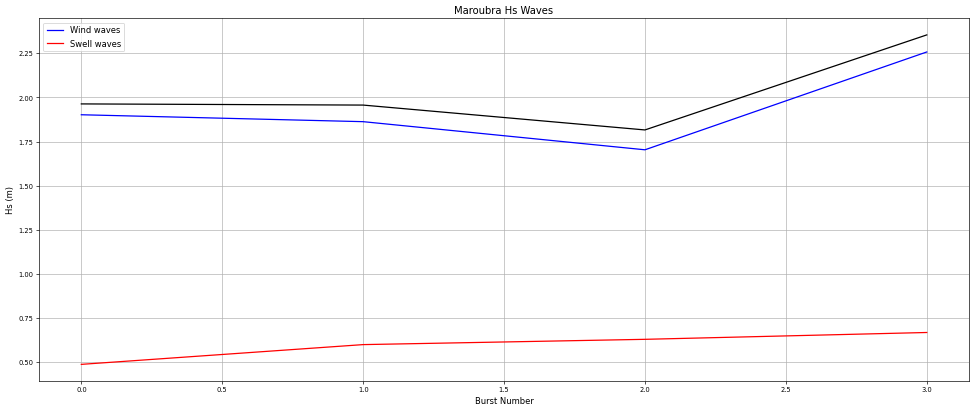

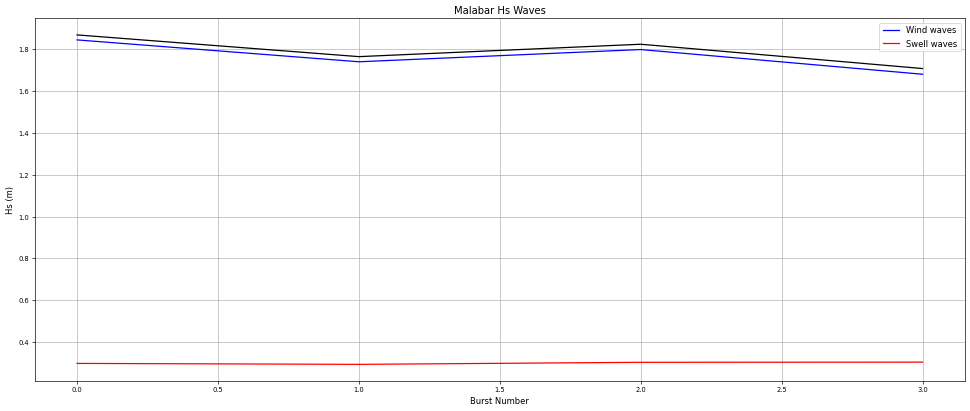

In [210]:
plot_ocn_waves(mar_waves, title = 'Maroubra')
plot_ocn_waves(mal_waves, title = 'Malabar')

## Spectral Analysis

We can use a Fast Fourier Transform to look at the data in the frequency domain.
<br>
![alt text](../data/images/FFT.png "An FFT converts a signal into its frequency components")
<i> An FFT converts a signal into its frequency components

In [214]:
#Lets set up a function to plot the data
def plot_spectral(data, title = 'title'):    
    f = data['f'] #frequency of the first burst
    Syy = data['Syy'] #spectrum of the first burst
    fig, ax = plt.subplots(figsize = (8,8))
    ax.plot(f[0,:],Syy[0,:], color='k')
    
    ax.set_xlabel('f (Hz)')
    ax.set_ylabel('Syy (m^2/Hz)')
    ax.set_xlim(0,0.6)
    ax.set_title(title)
    plt.show()
    


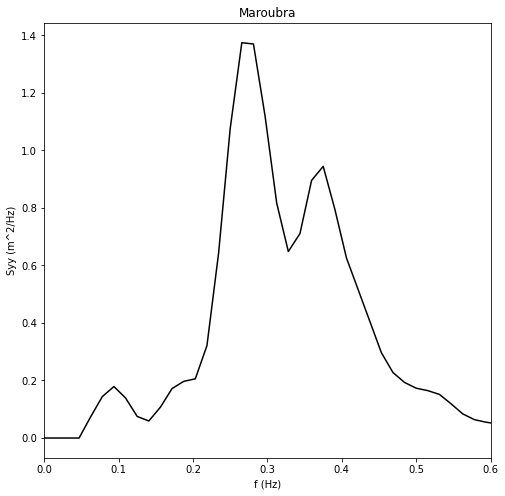

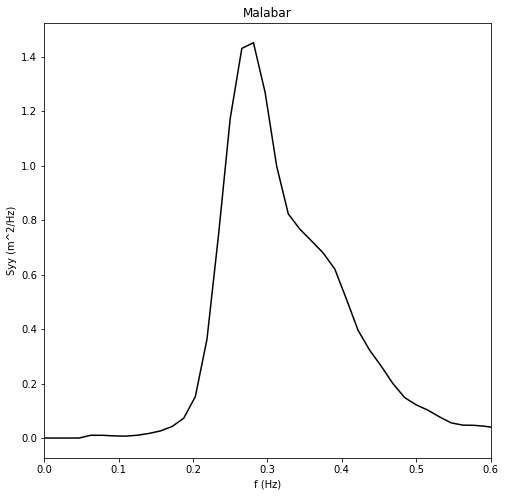

In [215]:
plot_spectral(mar_waves, 'Maroubra')
plot_spectral(mal_waves, 'Malabar')

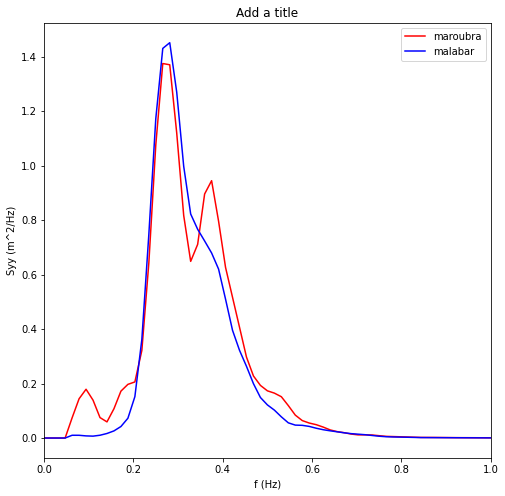

In [216]:
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(mar_waves['f'][0,:],mar_waves['Syy'][0,:], color='r', label = 'maroubra')
ax.plot(mal_waves['f'][0,:],mal_waves['Syy'][0,:], color='b', label = 'malabar')
ax.set_xlabel('f (Hz)')
ax.set_ylabel('Syy (m^2/Hz)')
ax.set_xlim(0,0.6)
ax.set_title('Add a title')   
ax.set_xlim(0,1)
ax.legend()

<p style="color:red"> <font size="3"> <b>
Look at your spectra! Where are the energy peaks for the swell (less than 20s or more than 
0.05Hz) band? Can you see the wind waves and the swell waves? Which periods do they 
have? 
<ol>
<li> Are there any differences between Maroubra and Malabar?
<ul> 
<li> Why do you think that those differences in incident wave energy are so obvious? 
<li> What happens at Malabar?
<li> Is there any obvious grouping?
<li> Can you find the infragravity? 
    </ul>
<li> Can you find online the offshore wave conditions for the day of our fieldtrip? 
<br>
<li>What is the frequency that separates short waves from long waves both surfzones?  
<br>
<li>Which waves have the greatest energy? 
</ol> 

<p style="color:red"> <font size="3"> <b> What are the values for Malabar and Maroubra? What are the differences? Can you think of 
a reason (or several) why the results are so different. </p></font>